# The Plan

- Get some data viz setup
- experiment with kalman filters
- mess with hotelling algos

In [1]:
# imports
%matplotlib inline
!pip install banpei
!pip uninstall numpy --yes
!pip install numpy

import matplotlib
import pandas as pd
import numpy as np
import banpei
import matplotlib.pyplot as plt
print("complete")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
You should consider upgrading via the '/usr/local/opt/python@3.8/bin/python3.8 -m pip install --upgrade pip' command.
Found existing installation: numpy 1.20.2
Uninstalling numpy-1.20.2:
  Successfully uninstalled numpy-1.20.2
  Using cached numpy-1.20.2-cp38-cp38-macosx_10_9_x86_64.whl (16.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.20.2 which is incompatible.
tensorflow 2.3.0 requires scipy==1.4.1, but you have scipy 1.6.3 which is incompatible.
You should consider upgrading via the '/usr/local/opt/python@3.8/bin/python3.8 -m pip install --upgrade pip' command.
complete


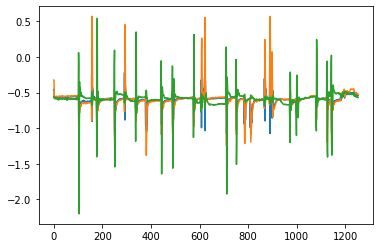

In [2]:
data = pd.read_csv('./data/LST/accelerometer.csv')

# data.plot(x="epoc (ms)", y="x-axis (g)", color="red")
# data.plot(x="epoc (ms)", y="y-axis (g)", color="green")
# data.plot(x="epoc (ms)", y="z-axis (g)")
# plt.figure(figsize=(20,20))
plt.plot([x-1.4 for x in data["y-axis (g)"]])
plt.plot([x+0 for x in data["z-axis (g)"]])
plt.plot([x-0.5 for x in data["x-axis (g)"]])
plt.show()
# print(data["x-axis (g)"])

In [21]:
# print(data["timestamp (-0700)"][102])
# print(data)

In [56]:
#x = data["x-axis (g)"] + data["y-axis (g)"] + data["z-axis (g)"]
x = data["x-axis (g)"]
y = data["y-axis (g)"]
z = data["z-axis (g)"]

model = banpei.Hotelling()

results_x = model.detect(x, 0.06)
results_y = model.detect(y, 0.06)
results_z = model.detect(z, 0.06)

results = [*results_x, *results_y, *results_z]

# data.plot(x="epoc (ms)", y="x-axis (g)", color="red")

24


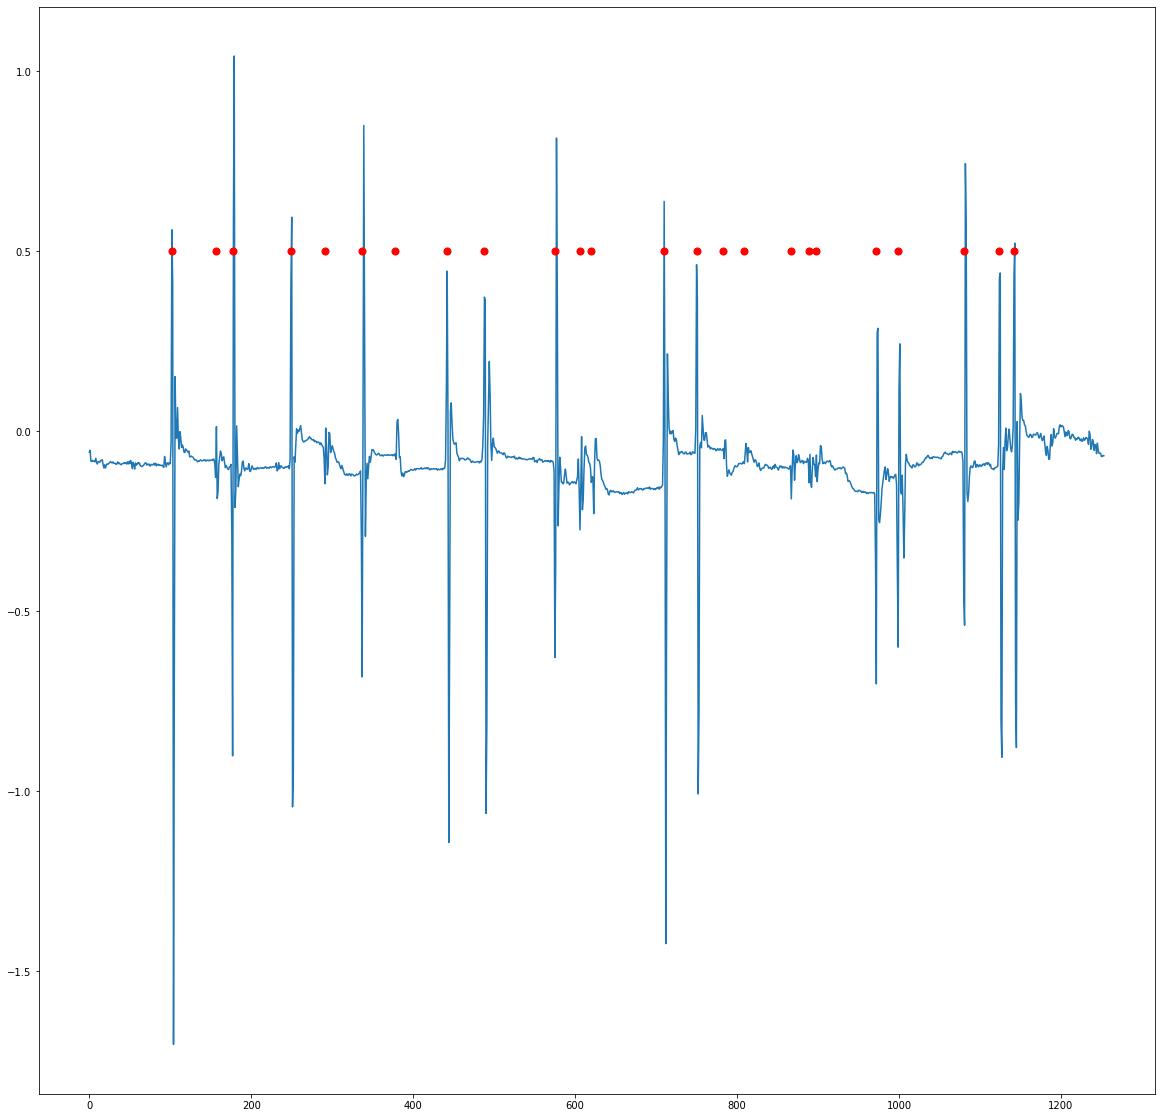

In [57]:
r = [x[0] for x in results]
r.sort()
fr = []

# get rid of detections from the same spike
for i in range(len(r)-1):
    if abs(r[i] - r[i-1]) > 2:
        fr.append(r[i])

print(len(fr))
plt.figure(figsize=(20,20))
plt.plot(x, zorder=-1)
plt.scatter(fr, [[0.5]*len(fr)], color="red", zorder=2, s=50)

# plt.show()

In [58]:
# (I'm assuming) the labels for the spikes
# Shouldn't this just be added into the datafile?
ts = '''00:00:04.3
00:00:06.0
00:00:11.8
00:00:15.1
00:00:18.9
00:00:22.2
00:00:27.3
00:00:31.0
00:00:37.9
00:00:40.5
00:00:41.7
00:00:48.8
00:00:52.1
00:00:54.8
00:00:56.9
00:01:01.5
00:01:03.2
00:01:04.0
00:01:09.9
00:01:12.1
00:01:18.7
00:01:22.3
00:01:23.7'''.split("\n")

# processing of the labels, converting them into seconds

def c_sec(time_str):
    h, m, s = time_str[:-2].split(':')
    return int(h) * 3600 + int(m) * 60 + int(s) + data["elapsed (s)"][fr[0]]


ts = list(map(c_sec, ts))

# print(list(ts))

a = []
for i in fr:
    a.append(data["elapsed (s)"][i])
# print(a)
print(ts)



[206.203, 208.203, 213.203, 217.203, 220.203, 224.203, 229.203, 233.203, 239.203, 242.203, 243.203, 250.203, 254.203, 256.203, 258.203, 263.203, 265.203, 266.203, 271.203, 274.203, 280.203, 284.203, 285.203]


24 23


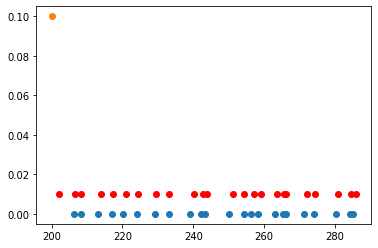

In [59]:
# print(len(ts))
# print(len(r))
print(len(a), len(ts))

plt.scatter(a, [0.01]*(len(a)), color="red")
plt.scatter(list(ts), [0]*len((ts)))

plt.scatter([200], [0.1])

As seen above, almost all of the spikes were detected, with a handful of double detections and missed detections.